1. Introduction

This project centers on the theme of mobility, aiming to address today's pressing global challenges with sustainable transportation solutions. Throughout the project the focusarea will be on shared mobility services, offering emission-free and efficient options to combat climate change, social disparities, and more.
Doing the project we conduct analysis based on predicting bike-sharing demand for clusters of stations using data from Citi Bike, a prominent bike-sharing system in the United States. Tasks include spatial clustering, demand prediction modeling, and fleet repositioning. Furthermore, we elaborate the analysis by exploring multiple unique research questions, uncovering new insights in mobility data using the data science cycle. 

(Extensions: The report may include optional extensions such as expanding the dataset, creating visualizations, and employing advanced data science techniques to enhance the project's value.)

As a final result we aim for this project to leverage data science to optimize mobility operations, foster innovation, and contribute to a sustainable future in urban transportation."

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("Trips_2018.csv")

In [ ]:
data.head()

2. Data cleaning 

The given data consists of multiple variables, in order to make sure the data is ready for in depth analysis we make sure that the data used do not consist of any missing information or lack of measurements as this could lead to outliers. 

As an initial beginning we strip the data for variables that we will exclude from the analysis. 
This includes:
Unnamed, bikeid and usertype. 

We list the columns that are being excluded from the raw data.

In [3]:
excluded_variables = ["Unnamed: 0", "bikeid", "usertype"]

Now excluding the multiple specified columns.

In [4]:
data.drop(excluded_variables, axis = 1, inplace = True)

The new data is saved as a new csv file named data1.

In [5]:
data.to_csv("data1.csv", index = False)
data1 = pd.read_csv("data1.csv")

We check the new data to see if the columns are excluded correctly.

In [ ]:
data1.head()

The new data is checked for any missing informations and measurements and thereby clean the data. We use  .isnull() methods from the Panda package to create a Boolean mask specifying where and if there exists any missing values in our data. 

In [6]:
missing_value = data1.isna()
rows_w_nan = data1[missing_value.any(axis = 1)]
print(rows_w_nan)

          tripduration                 starttime                  stoptime  \
10413518          2544  2018-08-15 11:31:37.8670  2018-08-15 12:14:02.1290   
10413697          2004  2018-08-15 11:35:26.0140  2018-08-15 12:08:50.0360   
10415434           213  2018-08-15 12:10:37.4360  2018-08-15 12:14:11.2920   
10415668           602  2018-08-15 12:15:17.3330  2018-08-15 12:25:19.7620   
10417031        511502  2018-08-15 12:41:41.9690  2018-08-21 10:46:44.6440   
...                ...                       ...                       ...   
17390711           589  2018-12-24 14:22:12.3950  2018-12-24 14:32:01.6410   
17393046           362  2018-12-24 15:34:09.8420  2018-12-24 15:40:12.1510   
17393363           276  2018-12-24 15:44:26.6440  2018-12-24 15:49:03.3450   
17423361           626  2018-12-26 15:08:40.3100  2018-12-26 15:19:06.8170   
17516014           464  2018-12-30 13:35:47.1420  2018-12-30 13:43:31.7420   

          start_station_id  start_station_latitude  start_stati

In [7]:
data1_cleaned = data1.dropna()

We now convert the starttime and stoptime from strings to datetime in order to make the data in numeric values. However, in order to be able to do so we first of all need to we comvert the original dataframe to a copy called data2.

In [8]:
data2 = data1_cleaned.copy()
data2["starttime"] = pd.to_datetime(data2["starttime"], format="%Y-%m-%d %H:%M:%S.%f")
data2["stoptime"] = pd.to_datetime(data2["stoptime"], format="%Y-%m-%d %H:%M:%S.%f")

In [ ]:
data2.head()

We look at the starttime and stopttime and elimate any impossible trips denoted by trips quicker than 1 minut and or longer than 5 hours. 

In [9]:
data2 = data2[(data2['stoptime'] - data2['starttime']).dt.total_seconds() >= 60]  
data2 = data2[(data2['stoptime'] - data2['starttime']).dt.total_seconds() <= 5 * 60 * 60]

We have now cleaned and updated our dataset trough different steps. In order to check if some steps should be modified, excluded or if we need further cleaning and adjustments we evaluate the current dataset by descriptive statistics.

In [ ]:
data2_descriptive_stats = data2.describe()
pd.options.display.float_format = '{:.2f}'.format
print(data2_descriptive_stats)

Tripduration:
The dataset contains approximately 17.5 million entries.
The average trip duration is about 824.58 seconds (approximately 13.7 minutes).
The standard deviation is around 808.80 seconds, indicating a fair amount of variability in trip durations.
The shortest trip duration is 61 seconds, while the longest trip duration is 20,106 seconds (about 5 hours and 35 minutes).

Start_station_id and end_station_id:
The columns "start_station_id" and "end_station_id" have similar summary statistics.
They both have a similar count of approximately 17.5 million entries.
The statistics include the mean, standard deviation, minimum, and maximum values of station IDs.

Birth_year:
The dataset contains approximately 17.5 million entries.
The average birth year is approximately 1978.99, suggesting that the majority of users were born around 1979.
The standard deviation of approximately 11.93 indicates some variability in birth years.
The minimum birth year is 1885, and the maximum birth year is 2002.

Gender:
The dataset contains approximately 17.5 million entries.
The "gender" column seems to have three unique values represented as 0, 1, and 2.
The mean of approximately 1.15 suggests that there is a dominant gender value (likely 1).
The standard deviation of approximately 0.54 indicates some variability in gender values.

DESCRIPTIVE STATS: 
Tendency (Central Tendency):

Mean (Average):
For "tripduration," the average trip duration is about 824.58 seconds (approximately 13.7 minutes).
For "start_station_id" and "end_station_id," the average values indicate central station IDs.
For "birth_year," the average birth year is around 1978.99, suggesting that the majority of users were born around 1979.
For "gender," the mean of approximately 1.15 indicates a dominant gender value (likely 1).

Spread (Variability):
Standard Deviation (std):
For "tripduration," the standard deviation is approximately 808.80 seconds, indicating a fair amount of variability in trip durations.
For "start_station_id" and "end_station_id," the standard deviations are relatively high, showing variability in station IDs.
For "birth_year," the standard deviation of approximately 11.93 suggests some variability in birth years.
For "gender," the standard deviation of approximately 0.54 indicates variability in gender values.
Distribution:

Minimum and Maximum:
The "tripduration" column has a wide distribution with a minimum of 61 seconds and a maximum of 20,106 seconds, indicating trips of varying lengths.
The "start_station_id" and "end_station_id" columns show the range of station IDs in your dataset.
The "birth_year" column spans from 1885 to 2002, with some users having birth years that fall outside the typical range.
The "gender" column has three unique values (0, 1, and 2), which suggests that it's not binary and may represent different gender categories.

To gain a deeper understanding of your dataset, we create visualizations. 

In [ ]:
# Plot histogram for arrivals
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(data2['end_station_id'], bins=20, edgecolor='k')
plt.xlabel('Number of Arrivals')
plt.ylabel('Frequency')
plt.title('Distribution of Arrivals')

# Plot histogram for departures
plt.subplot(1, 2, 2)
plt.hist(data2['start_station_id'], bins=20, edgecolor='k')
plt.xlabel('Number of Departures')
plt.ylabel('Frequency')
plt.title('Distribution of Departures')

plt.tight_layout()
plt.show()

CLUSTERING

The optimal number of clusters are found by the value of k where the distortion in the Elbow Method plot starts to level off or reach an "elbow" point, indicating the optimal number of clusters.

CHAT GPT: 
Determine the Optimal Number of Clusters: The code aims to find the optimal number of clusters by performing K-Means clustering with a range of different cluster numbers (from 20 to 49). It uses the Elbow Method to do this.

Elbow Method Calculation: Within a loop, the code initializes K-Means clustering for each value of k in the specified range. It fits the K-Means model to the station coordinates and calculates the distortion (Sum of Squared Distances, SSD) for each k. The distortion is a measure of how close the data points within each cluster are to the cluster's centroid. The distortion is stored in the distortions list for each k.

Elbow Method Plot: After calculating the distortions for different values of k, the code plots the Elbow Method graph. The x-axis represents the number of clusters (k), and the y-axis represents the distortion (SSD). The graph typically shows a curve where the distortion decreases as the number of clusters increases. The "elbow" point on the graph, where the rate of decrease starts to slow down, is often considered the optimal number of clusters.

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Extract the latitude and longitude features
stations = data2[['start_station_latitude', 'start_station_longitude']]

# Find the optimal number of clusters using the Elbow Method
distortions = []
K = range(20, 50)  # Adjust the range based on your minimum required clusters (at least 20)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(stations)
    distortions.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (SSD)')
plt.title('The Elbow Method for Optimal k')
plt.show()

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Extract relevant columns
stations = data[['start_station_latitude', 'start_station_longitude']]

# Number of clusters (at least 20)
num_clusters = 20

# Initialize K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

# Fit the K-Means model to your data
kmeans.fit(stations)

# Add cluster labels to your dataset
data['cluster'] = kmeans.labels_

# Now 'data' contains a new column 'cluster' with cluster labels

# Print the number of stations in each cluster
print(data['cluster'].value_counts())

# Optional: Visualize the clusters on a map
import matplotlib.pyplot as plt
plt.scatter(data['start_station_longitude'], data['start_station_latitude'], c=data['cluster'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Clustering of Stations')
plt.show()


We then try to standadize the data by applying the log.

Additionally, we consider temporal trends by creating a time series plots in order to evaluate trends over time, such as bike rental patterns by hour, day, or month. We use the starttime variable as our timestamp.

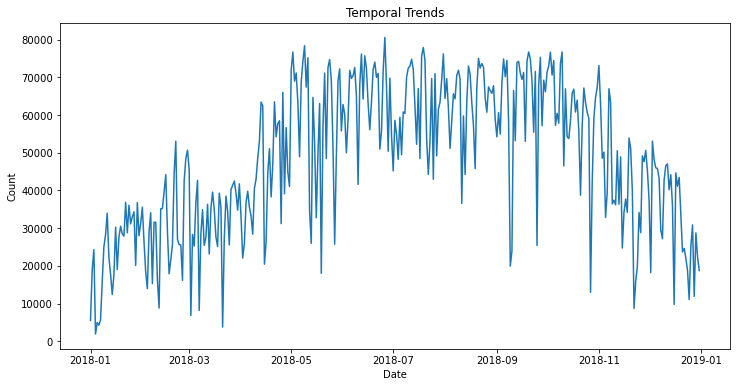

In [17]:
data2['starttime'] = pd.to_datetime(data2['starttime'])
data2.set_index('starttime', inplace=True)

# Resample data by day (you can adjust the frequency as needed)
daily_data = data2.resample('D').size()

plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data.values)
plt.title('Temporal Trends')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

Next, we visualize Correlation matrices and scatter plots with the goal of exploring the relationships between numerical variables by creating correlation matrices or scatter plots to identify correlations, positive or negative.

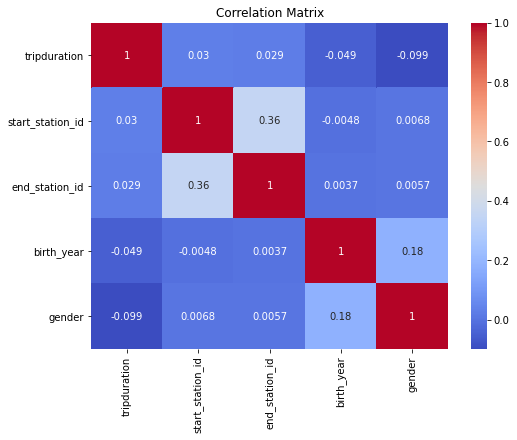

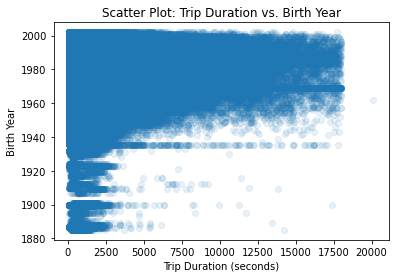

In [18]:
correlation_matrix = data2.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Looking into grouped data to study data trends based on groupings, such as average trip duration per month or station. -> needs modifications in the data starttime, split time and date.

In [21]:
# Assuming you have a grouping variable 'month' (e.g., extracted from 'timestamp')
monthly_means = data2.groupby('month')['tripduration'].mean()

# Grouped bar plot for monthly trip duration means
monthly_means.plot(kind='bar', color='lightgreen')
plt.title('Average Trip Duration by Month')
plt.xlabel('Month')
plt.ylabel('Average Trip Duration (seconds)')
plt.show()

KeyError: 'month'

Comment for task 2: We see that for the same start station id 72 the longitude and latitude is the same for all cases of station 72. Furthermore, we check to see how many different starting stations we have in the dataset and thereby cluster the data into 20 clusters. 

In [23]:
unique_values = data2["start_station_id"].nunique()
print(unique_values)

818


We find the optimal number of clusters to make, knowning that we need to create no less than 20 clusters. In order to do so we use the K-means technique.

In [25]:
unique_stations = data2['start_station_id'].unique()
station_count = len(unique_stations)

# Print the number of unique start_station_ids and their names
print(f"Number of unique start_station_ids: {station_count}")
print("Unique start_station_ids:")
for station_id in unique_stations:
    count = data2['start_station_id'].value_counts()[station_id]
    print(f"Station {station_id}: {count} trips")


Number of unique start_station_ids: 818
Unique start_station_ids:
Station 72.0: 38385 trips
Station 79.0: 27177 trips
Station 82.0: 10212 trips
Station 83.0: 13097 trips
Station 119.0: 3218 trips
Station 120.0: 10535 trips
Station 127.0: 60639 trips
Station 128.0: 60801 trips
Station 143.0: 23121 trips
Station 144.0: 8667 trips
Station 146.0: 28980 trips
Station 150.0: 27884 trips
Station 151.0: 72575 trips
Station 152.0: 3385 trips
Station 157.0: 19836 trips
Station 161.0: 34845 trips
Station 164.0: 29937 trips
Station 167.0: 43280 trips
Station 168.0: 71243 trips
Station 173.0: 62155 trips
Station 174.0: 37232 trips
Station 195.0: 39923 trips
Station 212.0: 44682 trips
Station 216.0: 7916 trips
Station 217.0: 31085 trips
Station 223.0: 39653 trips
Station 228.0: 26184 trips
Station 229.0: 75708 trips
Station 232.0: 13718 trips
Station 236.0: 51731 trips
Station 237.0: 54298 trips
Station 238.0: 26425 trips
Station 239.0: 27211 trips
Station 241.0: 14540 trips
Station 242.0: 11401 tri

In [26]:
# Sample code that prints station information
unique_stations = data2['start_station_id'].unique()
station_count = len(unique_stations)

# Create lists to store station information
station_ids = []
trip_counts = []

for station_id in unique_stations:
    count = data2['start_station_id'].value_counts()[station_id]
    station_ids.append(station_id)
    trip_counts.append(count)

# Create a new DataFrame from the lists
station_data = pd.DataFrame({
    'start_station_id': station_ids,
    'trip_count': trip_counts
})

# Save the DataFrame to a CSV file
station_data.to_csv('station_data.csv', index=False)


In [27]:
station_data.head()

,start_station_id,trip_count
0,72.00,38385
1,79.00,27177
2,82.00,10212
3,83.00,13097
4,119.00,3218


Now we have created a dataframe that we are able to work mere efficiently with. In the next step, we cluster the data in no less than 20 clusters. We cluster the stations spatially based on nearby departing stations such that they are grouped together. 

Contribution table: 


| Section         | Contributors        |
|-----------------|---------------------|
| Introduction    |             |
| Data Cleaning   |      |
| Prediction challenge, clustering   |   |
| Prediction challenge, prediction model  |  |
